In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_rows', None)
df = pd.read_csv('buyers_data.csv')
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [3]:
# change the format of column titles to lowercase
df.columns = df.columns.str.lower()
df.sample()

,id,marital status,gender,income,children,education,occupation,home owner,cars,commute distance,region,age,purchased bike
176,12253,Single,Female,20000.0,0.0,Partial College,Manual,Yes,0.0,0-1 Miles,Pacific,29.0,Yes


In [4]:
# rename all the column title by replacing the space with underscore
df.columns = df.columns.str.replace(' ', '_')
df.sample()

,id,marital_status,gender,income,children,education,occupation,home_owner,cars,commute_distance,region,age,purchased_bike
710,23358,Married,Male,60000.0,0.0,High School,Professional,Yes,2.0,5-10 Miles,North America,32.0,Yes


In [5]:
# check the basic info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1000 non-null   int64  
 1   marital_status    993 non-null    object 
 2   gender            989 non-null    object 
 3   income            994 non-null    float64
 4   children          992 non-null    float64
 5   education         1000 non-null   object 
 6   occupation        1000 non-null   object 
 7   home_owner        996 non-null    object 
 8   cars              991 non-null    float64
 9   commute_distance  1000 non-null   object 
 10  region            1000 non-null   object 
 11  age               992 non-null    float64
 12  purchased_bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [6]:
# change all the NaN values of column marital_status with 'Single'
df['marital_status'] = df['marital_status'].fillna('Single') # it's safe and better to put single status if not sure or unknown

In [7]:
# check for other columns that contained null values
df.isnull().sum()

id                   0
marital_status       0
gender              11
income               6
children             8
education            0
occupation           0
home_owner           4
cars                 9
commute_distance     0
region               0
age                  8
purchased_bike       0
dtype: int64

In [8]:
# fill all the null values
df.gender = df.gender.fillna('Male') # because majority or mostly default value of unknown gender is MALE
df['income'] = df['income'].fillna(df.income.mode()[0]) # used the most common value that exist in the 'income' column
df.children = df['children'].fillna(df.children.mode()[0]) # used the most common value that exist in the 'children' column
df['home_owner'] = df.home_owner.fillna('Yes') # used 'Yes' to fill because the count of Yeses are more than Nos
df['cars'] = df['cars'].fillna(df['cars'].median()) # used the middle value of column car

In [9]:
# check again if there are still null values in the dataframe
df.isna().sum()

id                  0
marital_status      0
gender              0
income              0
children            0
education           0
occupation          0
home_owner          0
cars                0
commute_distance    0
region              0
age                 8
purchased_bike      0
dtype: int64

In [10]:
# there are still null values in the age column
# a function that supply age base on the most common age value per gender
def suppy_missing_values(file):
    file.loc[(df['gender'] == 'Female') & (df['age'].isnull()), 'age'] = df['age'].fillna(df[df['gender'] == 'Female']['age'].mode()[0])
    file.loc[(df['gender'] == 'Male') & (df['age'].isnull()), 'age'] = df['age'].fillna(df[df['gender'] == 'Male']['age'].mode()[0])
    
    return file
suppy_missing_values(df)

,id,marital_status,gender,income,children,education,occupation,home_owner,cars,commute_distance,region,age,purchased_bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,Male,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,Male,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [12]:
# check again for null values
df.isnull().sum()

id                  0
marital_status      0
gender              0
income              0
children            0
education           0
occupation          0
home_owner          0
cars                0
commute_distance    0
region              0
age                 0
purchased_bike      0
dtype: int64

In [13]:
# check and fix the datatypes of each column
df.dtypes

id                    int64
marital_status       object
gender               object
income              float64
children            float64
education            object
occupation           object
home_owner           object
cars                float64
commute_distance     object
region               object
age                 float64
purchased_bike       object
dtype: object

In [14]:
# function that converts all float datatypes into int dtypes 
def conv_to_int(file):
    for column in file.columns:
        if file[column].dtype == 'float64':
            file[column] = df[column].astype('Int64')  # Use 'Int64' to handle potential NaN values as integers

    return file
conv_to_int(df)

,id,marital_status,gender,income,children,education,occupation,home_owner,cars,commute_distance,region,age,purchased_bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [15]:
# check again the datatypes
df.dtypes

id                   int64
marital_status      object
gender              object
income               Int64
children             Int64
education           object
occupation          object
home_owner          object
cars                 Int64
commute_distance    object
region              object
age                  Int64
purchased_bike      object
dtype: object

In [16]:
df.describe()

,id,income,children,cars,age
count,1000.000000,1000.0,1000.0,1000.0,1000.0
mean,19965.992000,56290.0,1.895,1.451,44.197
std,5347.333948,30975.722678,1.629303,1.117519,11.319643
min,11000.000000,10000.0,0.0,0.0,25.0
25%,15290.750000,30000.0,0.0,1.0,35.0
50%,19744.000000,60000.0,2.0,1.0,43.0
75%,24470.750000,70000.0,3.0,2.0,52.0
max,29447.000000,170000.0,5.0,4.0,89.0


In [17]:
# make a new column called 'commute_distance_km'
df['commute_distance_km'] = df['commute_distance'].str.split(pat=' ').str[0].str.split('+').str[0]
df.sample()

,id,marital_status,gender,income,children,education,occupation,home_owner,cars,commute_distance,region,age,purchased_bike,commute_distance_km
804,13154,Married,Male,40000,0,High School,Skilled Manual,No,2,0-1 Miles,North America,27,Yes,0-1


In [18]:
# number of items in an array after splitting them
# count = 
df['commute_distance_km'].str.split(pat='-').apply(lambda arr: len(arr))

0      2
1      2
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    1
Name: commute_distance_km, Length: 1000, dtype: int64

In [19]:
# combination of starting values and final values
# combi = 
pd.concat([(df['commute_distance_km'].str.split(pat='-').str[0].astype('int') * 1.609).astype('str'), 
                    (df['commute_distance_km'].str.split(pat='-').str[-1].astype('int') * 1.609).astype('str')], 
                   axis=1).apply(lambda row: '-'.join(row), axis=1)

0        0.0-1.609
1        0.0-1.609
2      3.218-8.045
3      8.045-16.09
4        0.0-1.609
          ...     
995    3.218-8.045
996    3.218-8.045
997      0.0-1.609
998    1.609-3.218
999    16.09-16.09
Length: 1000, dtype: object

In [20]:
# convert first value from miles to km
df['commute_distance_km'].str.split(pat='-').str[0].astype('int') * 1.609

0       0.000
1       0.000
2       3.218
3       8.045
4       0.000
        ...  
995     3.218
996     3.218
997     0.000
998     1.609
999    16.090
Name: commute_distance_km, Length: 1000, dtype: float64

In [21]:
# convert second value from miles to km
(df['commute_distance_km'].str.split(pat='-').str[-1].astype('int') * 1.609).astype('str')

0      1.609
1      1.609
2      8.045
3      16.09
4      1.609
       ...  
995    8.045
996    8.045
997    1.609
998    3.218
999    16.09
Name: commute_distance_km, Length: 1000, dtype: object

In [22]:
# first value that extracted from the orig col 'commute_distance'
### cd_first_val = df['commute_distance'].str.split(pat=' ').str[0].str.replace('+', '').str.split(pat='-').str[0]

# second value that extracted from the orig col 'commute_distance'
### cd_second_val = df['commute_distance'].str.split(pat=' ').str[0].str.replace('+', '').str.split(pat='-').str[-1]

# average value that extracted from the orig col 'commute_distance'
### avg_cd = (df['commute_distance'].str.split(pat=' ').str[0].str.replace('+', '').str.split(pat='-').str[0].astype('int') +
### df['commute_distance'].str.split(pat=' ').str[0].str.replace('+', '').str.split(pat='-').str[-1].astype('int')) / 2

In [23]:
# function that converts miles values to km values
def miles_to_km(file):
    
    count = df['commute_distance_km'].str.split(pat='-').apply(lambda arr: len(arr))
    combi = pd.concat([
        (df['commute_distance_km'].str.split(pat='-').str[0].astype('int') * 1.609).astype('str'),
        (df['commute_distance_km'].str.split(pat='-').str[-1].astype('int') * 1.609).astype('str')
    ], axis=1).apply(lambda row: '-'.join(row), axis=1)
    single_val = df['commute_distance_km'].str.split(pat='-').str[0].astype('int') * 1.609
    num = 2
    
    file = np.where(count == num, combi, single_val)
    
    df['commute_distance_km'] = file
    return df['commute_distance_km']

miles_to_km(df)

0        0.0-1.609
1        0.0-1.609
2      3.218-8.045
3      8.045-16.09
4        0.0-1.609
          ...     
995    3.218-8.045
996    3.218-8.045
997      0.0-1.609
998    1.609-3.218
999          16.09
Name: commute_distance_km, Length: 1000, dtype: object

In [24]:
# function for making the column 'average_commute_distance_km'
def avg_commute_distance_km(file):
    
    cd_first_val = df['commute_distance'].str.split(pat=' ').str[0].str.replace('+', '').str.split(pat='-').str[0].astype('int')
    cd_second_val = df['commute_distance'].str.split(pat=' ').str[0].str.replace('+', '').str.split(pat='-').str[-1].astype('int')
    val_count = 2
    avg_cd = (cd_first_val + cd_second_val) / val_count
    
    df['avg_commute_distance_km'] = avg_cd * 1.609 # because 1 mile = 1.609 km
    file = df['avg_commute_distance_km']
    
    return file

avg_commute_distance_km(df)

0       0.8045
1       0.8045
2       5.6315
3      12.0675
4       0.8045
        ...   
995     5.6315
996     5.6315
997     0.8045
998     2.4135
999    16.0900
Name: avg_commute_distance_km, Length: 1000, dtype: float64

In [25]:
# remove the commute_distance column
df.drop('commute_distance', axis=1, inplace=True)

In [26]:
df.head()

,id,marital_status,gender,income,children,education,occupation,home_owner,cars,region,age,purchased_bike,commute_distance_km,avg_commute_distance_km
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,Europe,42,No,0.0-1.609,0.8045
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,Europe,43,No,0.0-1.609,0.8045
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,Europe,60,No,3.218-8.045,5.6315
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,Pacific,41,Yes,8.045-16.09,12.0675
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,Europe,36,Yes,0.0-1.609,0.8045


In [27]:
# people whose finish their education in bachelor level
df[df['education'] == 'Bachelors']['occupation'].value_counts()

occupation
Management        97
Professional      92
Skilled Manual    66
Clerical          49
Manual             2
Name: count, dtype: int64

In [28]:
# number of people who finished masteral and worked as professional or manager
df[(df['education'] == 'Graduate Degree') & ((df['occupation'] == 'Management') | (df['occupation'] == 'Professional'))].value_counts().count()
    # there 104 who finished masteral and worked as professional or manager

104

In [29]:
# number of people who didn't finish high school but still worked as professional or manager
df[(df['education'] == 'Partial High School') & ((df['occupation'] == 'Management') | (df['occupation'] == 'Professional'))].value_counts().count()
    # there only 4 who didn't finish high school but still worked as professional or manager

4

In [30]:
df['education'].value_counts()

education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64

In [31]:
# which region has the most number of MARRIED man and woman
df[df['marital_status'] == 'Married'].groupby('gender')['region'].value_counts()
    # both in North America has the most number of married men and women based from the records

gender  region       
Female  North America    124
        Europe            77
        Pacific           38
Male    North America    173
        Europe            68
        Pacific           55
Name: count, dtype: int64

In [32]:
# which region has the most number of SINGLE man and woman
df[df['marital_status'] == 'Single'].groupby('gender')['region'].value_counts()
    # both in North America has the most number of single men and women based from the records

gender  region       
Female  North America    115
        Europe            87
        Pacific           48
Male    North America     96
        Europe            68
        Pacific           51
Name: count, dtype: int64

In [33]:
# what job has the largest salary and purchased a bike?
df[(df['purchased_bike'] == 'Yes') & (df['income'] == df['income'].max())]['occupation']

43    Professional
Name: occupation, dtype: object

In [34]:
# get the number of male who are married has 2 or more children
df[(df['marital_status'] == 'Married') & (df['children'] >= 2) & (df['gender'] == 'Male')]['gender'].count()
    # there are 179 men in the records

179

In [35]:
# get the number of female who are married has 2 or more children
df[(df['marital_status'] == 'Married') & (df['children'] >= 2) & (df['gender'] == 'Female')]['gender'].count()
    # there are 133 women in the records

133

In [36]:
# get the number of male who are single but has 1 or more children
df[(df['marital_status'] == 'Single') & (df['children'] >= 1) & (df['gender'] == 'Male')]['gender'].count()
    # there are 129 men that has child/children

129

In [37]:
# get the number of female who are single but has 1 or more children
df[(df['marital_status'] == 'Single') & (df['children'] >= 1) & (df['gender'] == 'Female')]['gender'].count()
    # all single women in the records has no child/children yet

158

In [38]:
# most common age of women who are single and no child
df[(df['gender'] == 'Female') & (df['marital_status'] == 'Single') & (df['children'] == 0)]['age'].mode()[0]
    # most of the women who are 31 years old are single and childless

31

In [39]:
# most common age of men who are single and no child
df[(df['gender'] == 'Male') & (df['marital_status'] == 'Single') & (df['children'] == 0)]['age'].mode()[0]
    # most of the men who are 30 years old are single and childless

30

In [40]:
# who buys bike more, men or women
df[df['purchased_bike'] == 'Yes'].groupby('gender')['gender'].count()
    # men bought more bike than women

gender
Female    239
Male      242
Name: gender, dtype: int64

In [41]:
# number of professional who has no car and bike
df[(df['cars'] == '0') & (df['purchased_bike'] == "No") & (df['occupation'] == 'Professional')]['occupation'].count()

0

In [42]:
# people's occupation who has both car and bike
df[(df['cars'] > 0) & (df['purchased_bike'] == 'Yes')]['occupation'].value_counts()

occupation
Professional      107
Skilled Manual     84
Management         67
Manual             41
Clerical           35
Name: count, dtype: int64

In [43]:
# for correlation only
corr_data = df.drop(columns = ['id', 'marital_status', 'gender', 'education', 'occupation', 'home_owner', 'region', 'purchased_bike', 'commute_distance_km'])
corr_data.corr()

,income,children,cars,age,avg_commute_distance_km
income,1.000000,0.253091,0.433564,0.169865,0.230909
children,0.253091,1.000000,0.265732,0.524605,0.152428
cars,0.433564,0.265732,1.000000,0.184546,0.395752
age,0.169865,0.524605,0.184546,1.000000,0.242402
avg_commute_distance_km,0.230909,0.152428,0.395752,0.242402,1.000000


In [44]:
# the children and age column has almost 0.6 correlation which is treated as 'good correlation',
# so we can say that as people grow older the number of their children also increases but ofc it is not the best correlation
# and maybe it still varies

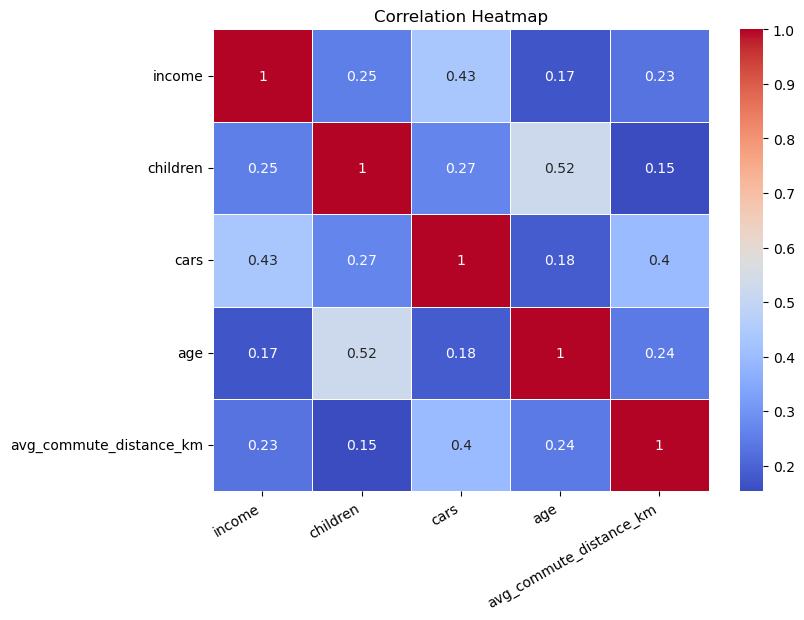

In [45]:
plt.figure(figsize=(8, 6))
corr_heatmap = sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
corr_heatmap.set_xticklabels(corr_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')
corr_heatmap.set_yticklabels(corr_heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')

plt.show()

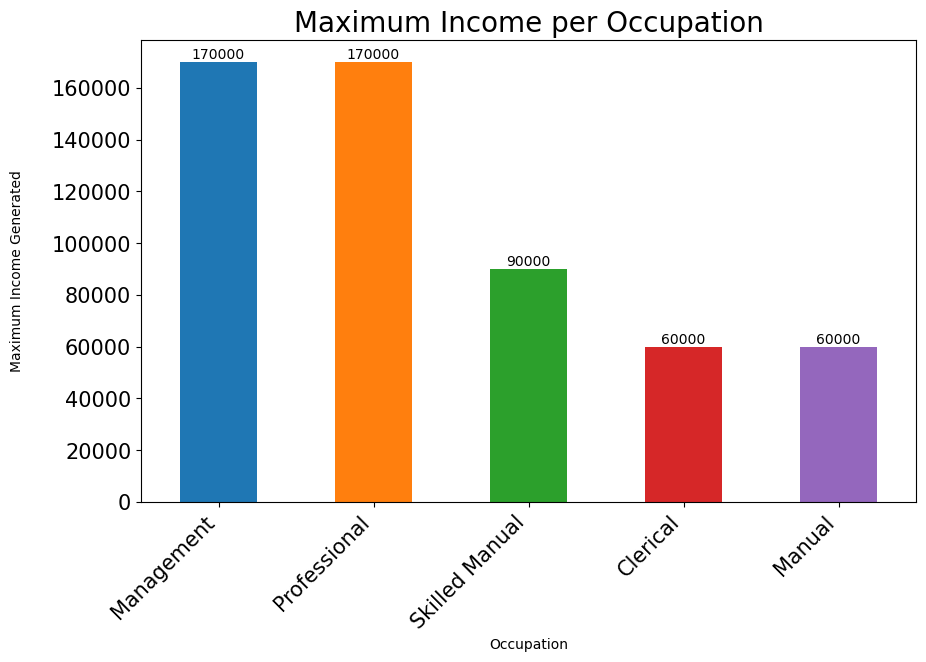

In [46]:
max_incomes = df.groupby('occupation')['income'].max().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = max_incomes.plot(kind = 'bar', color = sns.color_palette('tab10'), rot = 0)
#ax.set_xticklabels(('Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual'))
ax.set_xticks(range(len(max_incomes))) # x-axis --dynamic


for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.title('Maximum Income per Occupation', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Maximum Income Generated', labelpad = 20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [47]:
# by just looking in the bar graph we can say that both management(manager) and professional got the highest salary
# it is true because they're mostly handle many people and hold a large responsibilities and duties in the company

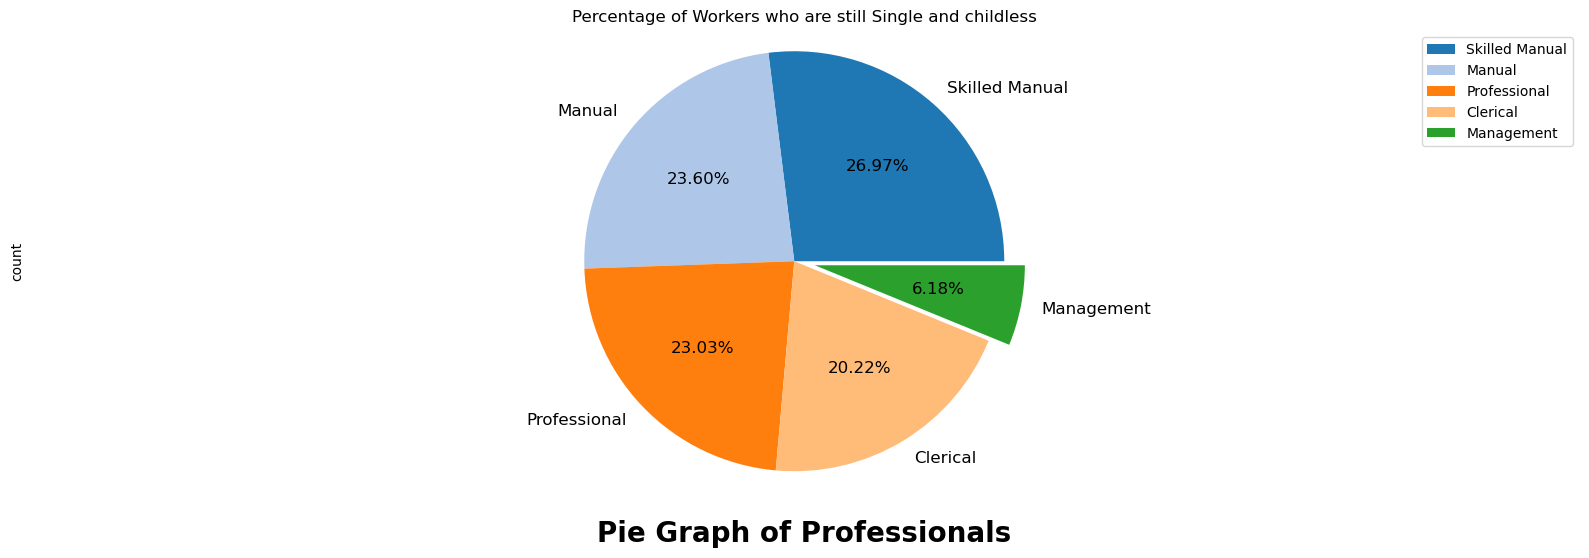

In [48]:
# people who are single and no child
info = df[(df['marital_status'] == 'Single') & (df['children'] == 0)]['occupation'].value_counts()

plt.figure(figsize = (20, 6))
explodes = (0, 0, 0, 0, 0.1)

info.plot(kind = 'pie', fontsize = 12, colors = sns.color_palette('tab20'), autopct = '%1.2f%%', explode = explodes)
plt.xlabel('Pie Graph of Professionals', weight = "bold", color = "black", fontsize = 20, labelpad = 20)
plt.axis('equal')
plt.title('Percentage of Workers who are still Single and childless')
plt.legend(loc = "best", labels = info.index)
plt.show()

In [49]:
# after looking and studying the graph we can conclude that people who are working as manager are married and has kids already
# because looking at the other data their salary is the highest same with the professional
# and with that amount of income monthly they can start to build a family without worrying financially
# compare to people whose salary are not that high, we can say that they are still preparing financially or
# they prefer to stay single, focus to work or use all their money for themselves only

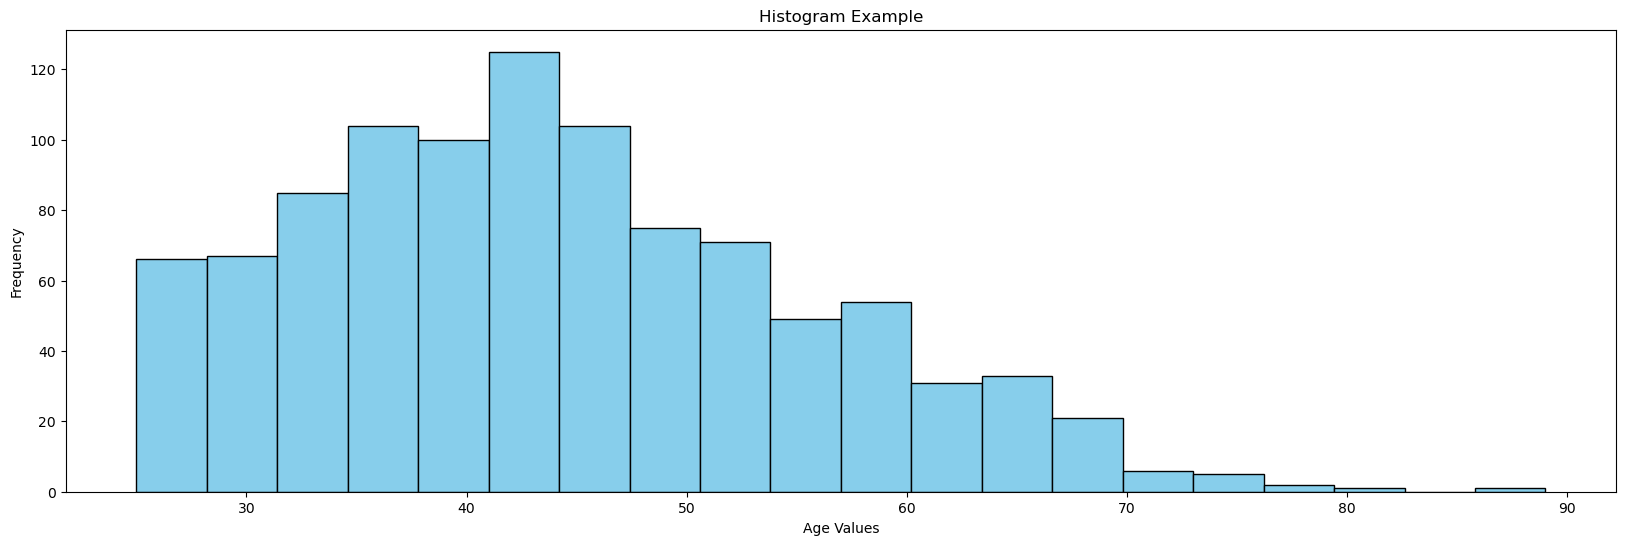

In [50]:
plt.figure(figsize = (20, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Histogram Example')
plt.xlabel('Age Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

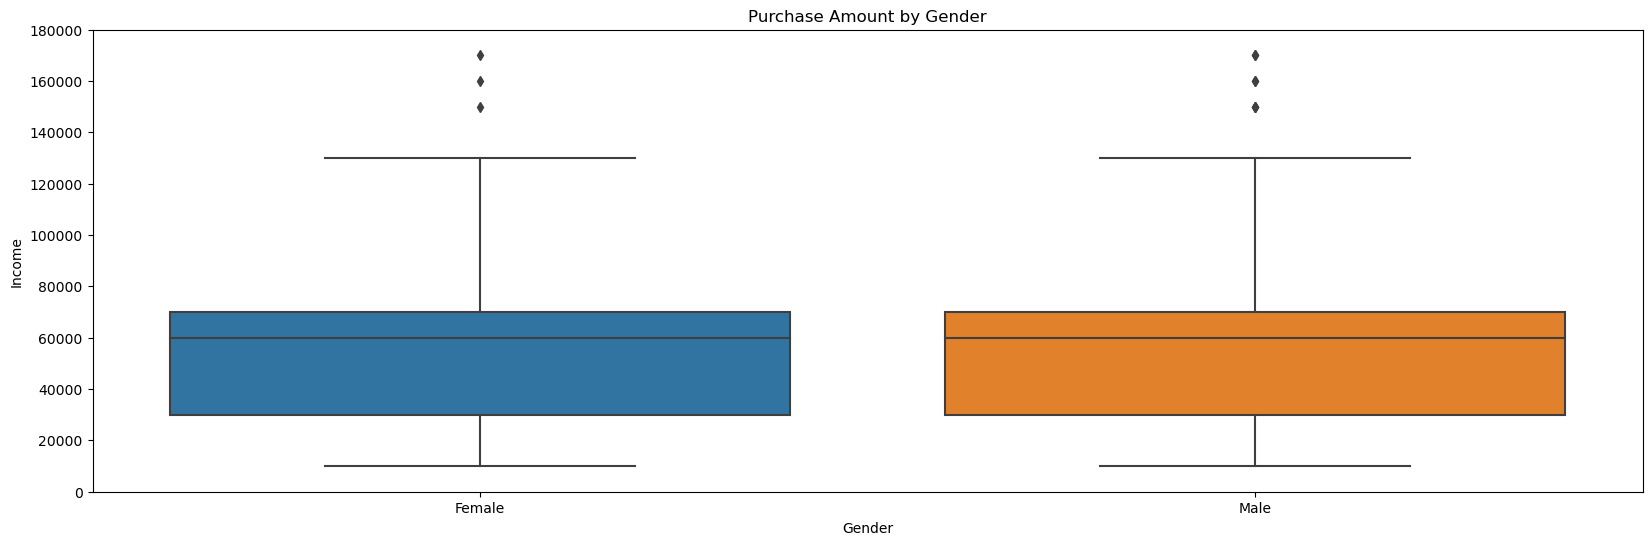

In [51]:
# box plot of purchase amount by gender
plt.figure(figsize = (20, 6))
sns.boxplot(x='gender', y='income', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.ylim(0, 180000)
plt.show()

In [52]:
df['income'].describe()

count          1000.0
mean          56290.0
std      30975.722678
min           10000.0
25%           30000.0
50%           60000.0
75%           70000.0
max          170000.0
Name: income, dtype: Float64

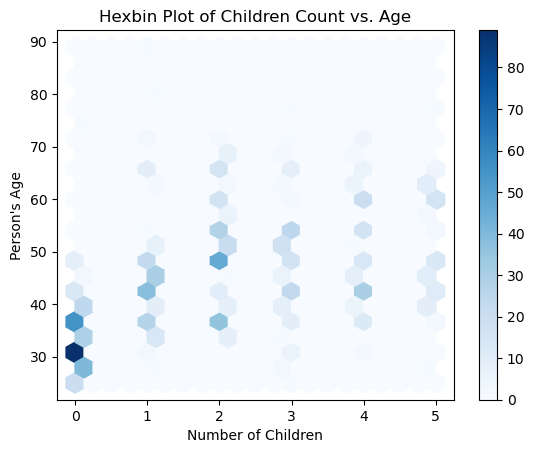

In [53]:
# hexbin plot of number of children vs person's age
plt.hexbin(df['children'], df['age'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Children Count vs. Age')
plt.xlabel('Number of Children')
plt.ylabel("Person's Age")
#plt.xlim(20, 90)
plt.colorbar()
plt.show()

In [54]:
# as the people grows older the number of their kids also increases and it is true because most people wanted more children
# especially if they are happily married and financially stable

In [55]:
df.groupby('gender')['children'].value_counts()

gender  children
Female  0           138
        2            94
        1            82
        3            75
        4            63
        5            37
Male    0           144
        2           115
        1            87
        4            63
        3            58
        5            44
Name: count, dtype: int64

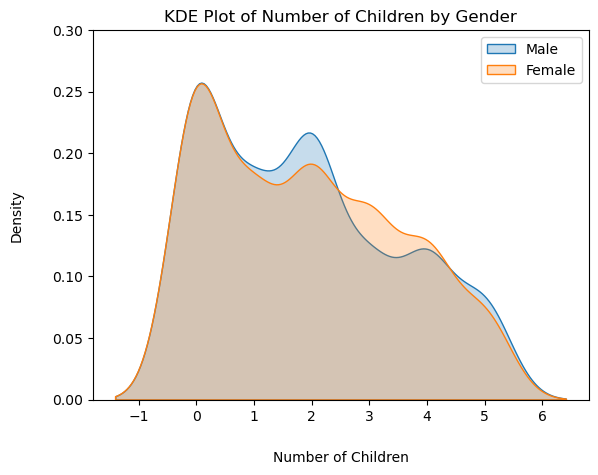

In [56]:
# kde plot of men and women who are married and has child/children

sns.kdeplot(df[df['gender'] == 'Male']['children'].astype('float'), label='Male', fill=True)
sns.kdeplot(df[df['gender'] == 'Female']['children'].astype('float'), label='Female', fill=True)
plt.title('KDE Plot of Number of Children by Gender')
plt.xlabel('Number of Children', labelpad = 20)
plt.ylabel('Density', labelpad = 20)
plt.ylim(0, 0.30)
plt.legend()

plt.show()

In [57]:
((df['children'].value_counts()) / 1000) * 100

children
0    28.2
2    20.9
1    16.9
3    13.3
4    12.6
5     8.1
Name: count, dtype: Float64

In [58]:
df.describe()

,id,income,children,cars,age,avg_commute_distance_km
count,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.000000
mean,19965.992000,56290.0,1.895,1.451,44.197,5.717581
std,5347.333948,30975.722678,1.629303,1.117519,11.319643,5.513174
min,11000.000000,10000.0,0.0,0.0,25.0,0.804500
25%,15290.750000,30000.0,0.0,1.0,35.0,0.804500
50%,19744.000000,60000.0,2.0,1.0,43.0,2.413500
75%,24470.750000,70000.0,3.0,2.0,52.0,12.067500
max,29447.000000,170000.0,5.0,4.0,89.0,16.090000


In [59]:
df.head(30)

,id,marital_status,gender,income,children,education,occupation,home_owner,cars,region,age,purchased_bike,commute_distance_km,avg_commute_distance_km
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,Europe,42,No,0.0-1.609,0.8045
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,Europe,43,No,0.0-1.609,0.8045
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,Europe,60,No,3.218-8.045,5.6315
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,Pacific,41,Yes,8.045-16.09,12.0675
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,Europe,36,Yes,0.0-1.609,0.8045
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,Europe,50,No,1.609-3.218,2.4135
6,27974,Single,Male,160000,2,High School,Management,Yes,4,Pacific,33,Yes,0.0-1.609,0.8045
7,19364,Married,Male,40000,1,Bachelors,Skilled Manual,Yes,0,Europe,43,Yes,0.0-1.609,0.8045
8,22155,Single,Male,20000,2,Partial High School,Clerical,Yes,2,Pacific,58,No,8.045-16.09,12.0675
9,19280,Married,Male,60000,2,Partial College,Manual,Yes,1,Europe,47,Yes,0.0-1.609,0.8045


In [60]:
# final check if there are still null values and correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   marital_status           1000 non-null   object 
 2   gender                   1000 non-null   object 
 3   income                   1000 non-null   Int64  
 4   children                 1000 non-null   Int64  
 5   education                1000 non-null   object 
 6   occupation               1000 non-null   object 
 7   home_owner               1000 non-null   object 
 8   cars                     1000 non-null   Int64  
 9   region                   1000 non-null   object 
 10  age                      1000 non-null   Int64  
 11  purchased_bike           1000 non-null   object 
 12  commute_distance_km      1000 non-null   object 
 13  avg_commute_distance_km  1000 non-null   float64
dtypes: Int64(4), float64(1), 

In [61]:
# save the dataframe to csv file to my machine
file_path = 'C:\\Users\\User\Downloads\python_processed_data.csv'

try:
    df.to_csv(file_path, index=False)
    print(f"File '{file_path}' saved successfully.")
except Exception as e:
    print(f"Error saving file: {e}")

File 'C:\Users\User\Downloads\python_processed_data.csv' saved successfully.
